In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from IPython.display import Image
import skimage
from skimage import io

**Exercise 1:** *Start by reading the image and inspect the histogram. Is it a *bimodal* histogram? Do you think it will be possible to segment it so only the bones are visible?* 

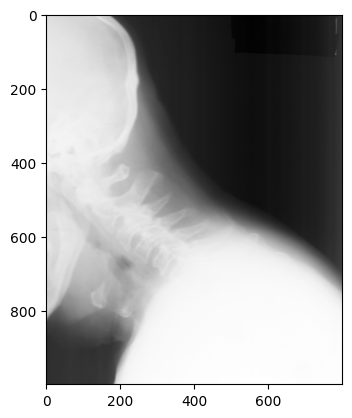

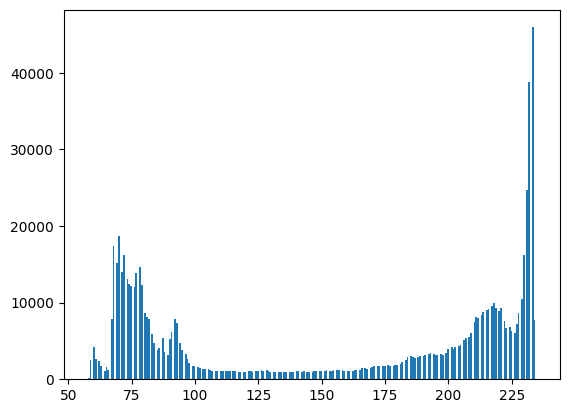

In [20]:
# Read image
img = io.imread('data/vertebra.png')
# Show image
plt.imshow(img, cmap='gray')
plt.show()
# Show histogram
plt.hist(img.ravel(), bins=256)
plt.show()


**Exercise 2:** *Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?*

In [21]:
print(f"Min: {np.min(img)}, Max: {np.max(img)}")

# Clearly the entire gray-scale spectrum isn't used so we can perhaps enhance the appearance of the image by using the entire spectrum.

Min: 57, Max: 235


**Exercise 3:** *Add an import statement to your script:*
```
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
```

*Read the image `vertebra.png` and compute and show the minumum and maximum values.*

*Use `img_as_float` to compute a new float version of your input image. Compute the minimum and maximum values of this float image. Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?*

## Conversion from float image to unsigned byte image

As stated above, an (unsigned) float image can have pixel values in [0, 1]. When using the Python skimage function `img_as_ubyte` on an (unsigned) float image, it will multiply all values with 255 before converting into a byte. Remember that all decimal number will be converted into integers by this, and some information might be lost.

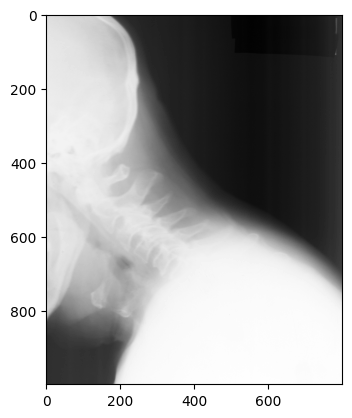

Min: 0.22352941176470587, Max: 0.9215686274509803


In [22]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

img_float = img_as_float(img)
plt.imshow(img_float, cmap='gray')
plt.show()

print(f"Min: {np.min(img_float)}, Max: {np.max(img_float)}")

In [23]:
print(f"Min: {np.min(img)/255}, Max: {np.max(img)/255}")

Min: 0.2235294117647059, Max: 0.9215686274509803


**Exercise 4:** *Use `img_as_ubyte` on the float image you computed in the previous exercise. Compute the Compute the minimum and maximum values of this image. Are they as expected?*

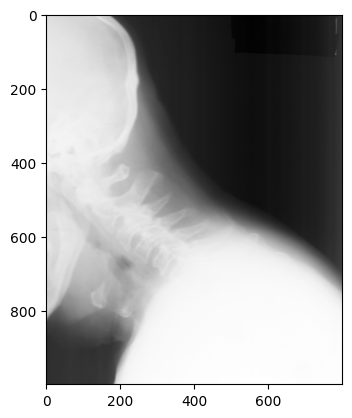

Min: 57, Max: 235


In [24]:
img_ubyte = img_as_ubyte(img_float)
plt.imshow(img_ubyte, cmap='gray')
plt.show()

print(f"Min: {np.min(img_ubyte)}, Max: {np.max(img_ubyte)}")

**Exercise 5:** *Implement a Python function called `histogram_stretch`. *Pretty much bare stretch et 0-255 grayscale billede helt ud.* Jeg laver selvfølgelig min egen med brug af en smart skimage funktion. :)

In [25]:
def histogram_stretch(img_in):
    # Strecth the histogram
    img_stretched = skimage.exposure.rescale_intensity(img_in)
    # Show image
    plt.imshow(img_stretched, cmap='gray')
    plt.show()
    # Show histogram
    plt.hist(img_stretched.ravel(), bins=256)
    plt.show()
    print(f"Min: {np.min(img_stretched)}, Max: {np.max(img_stretched)}")

**Exercise 6:** *Test your `histogram_stretch` on the `vertebra.png` image. Show the image before and after the histogram stretching. What changes do you notice in the image? Are the important structures more visible?*

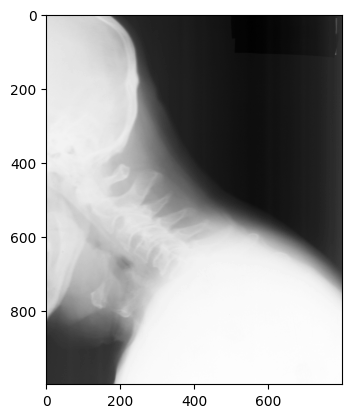

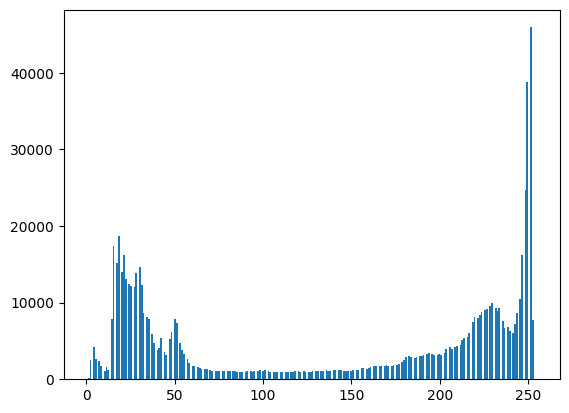

Min: 0, Max: 255


In [26]:
histogram_stretch(img)

# Non-linear pixel value mapping

The goal is to implement and test a function that performs a $\gamma$-mapping of pixel values:

$$g(x,y) = f(x,y)^\gamma \enspace .$$

You can use the *Numpy* function `power` to compute the actual mapping function. 

**Exercise 7:** *Implement a function, `gamma_map(img, gamma)`, that:*

1. Converts the input image to float
2. Do the gamma mapping on the pixel values
3. Returns the resulting image as an unsigned byte image.

In [27]:
def gamma_map(img, gamma):
    img_as_float = skimage.img_as_float(img)
    img_gamma = skimage.exposure.adjust_gamma(img_as_float, gamma)
    
    # Set up a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the image on the left
    axes[0].imshow(img_gamma, cmap='gray')
    axes[0].set_title("Gamma Adjusted Image")
    
    # Plot histogram on the right side
    axes[1].hist(img_gamma.ravel(), bins=256)
    axes[1].set_title("Histogram")
    
    plt.tight_layout()  # Adjusts spacing between subplots for better appearance
    plt.show()
    
    print(f"Min: {np.min(img_gamma)}, Max: {np.max(img_gamma)}")

**Exercise 8:** *Test your `gamma_map` function on the vertebra image or another image of your choice. Try different values of* $\gamma$, *for example 0.5 and 2.0. Show the resuling image together with the input image. Can you see the differences in the images?*

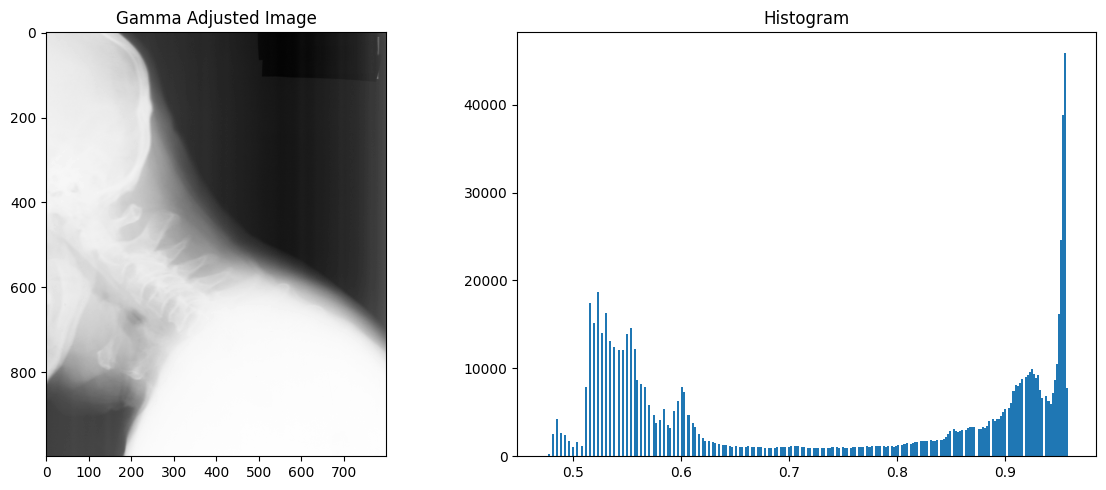

Min: 0.4727889717037675, Max: 0.9599836599916586


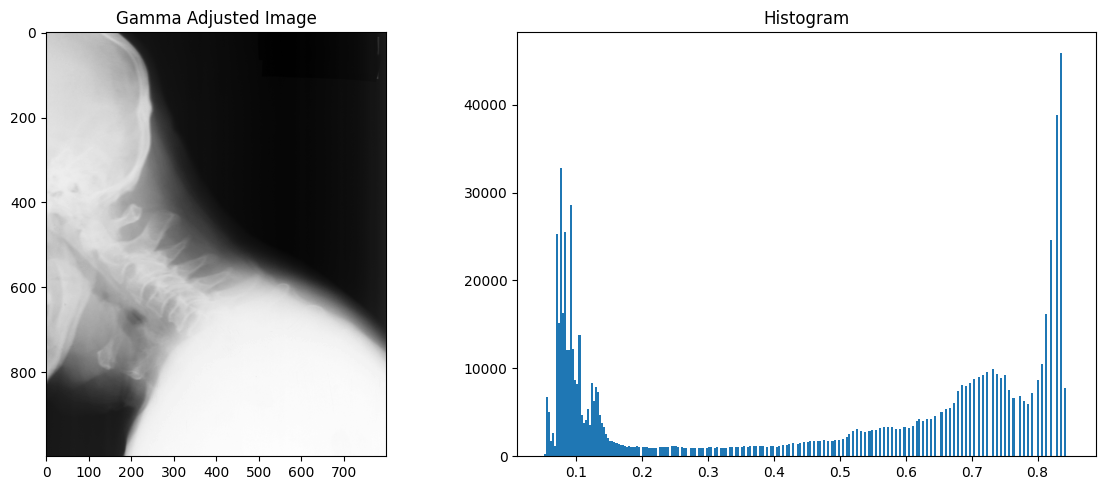

Min: 0.04996539792387542, Max: 0.8492887351018837


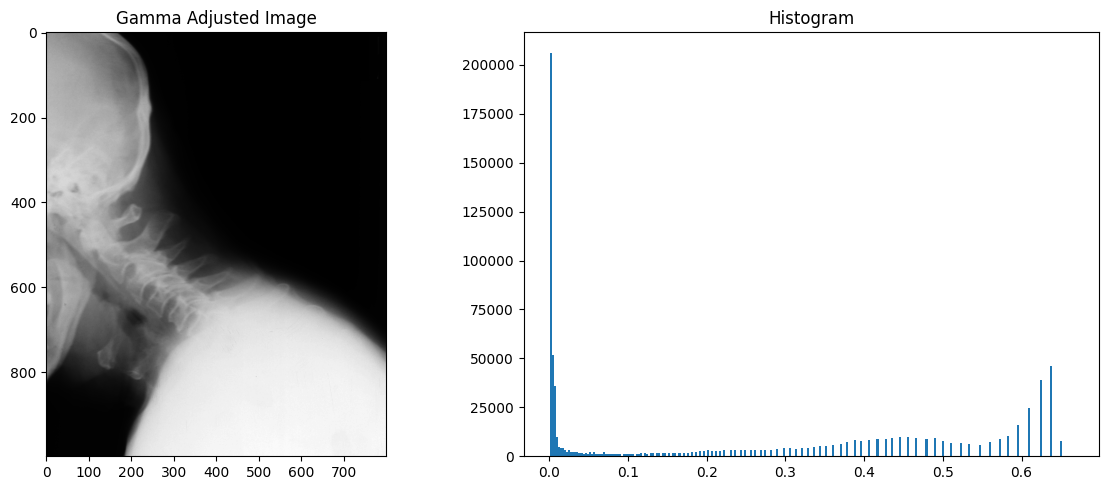

Min: 0.0005580503388721538, Max: 0.6647194845457846


In [28]:
gamma_map(img, 0.5)
gamma_map(img, 2.0)
gamma_map(img, 5.0)


# Image segmentation by thresholding

Now we will try to implement some functions that can seperate an image into *segments*. In this exercise, we aim at seperating the *background* from the *foreground* by setting a threshold in a gray scale image or several thresholds in color images.

**Exercise 9:** *Implement a function, `threshold_image` :*

In [29]:
def threshold_image(img_in, threshold):
    # Convert to float
    img_float = skimage.img_as_float(img_in)
    
    # Apply threshold
    img_thresholded = np.where(img_float >= threshold, img_float, 0)
    
    # Convert thresholded image to unsigned byte format for visualization
    img_ubyte = skimage.img_as_ubyte(img_thresholded)

    # Set up a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the image on the left
    axes[0].imshow(img_ubyte, cmap='gray')
    axes[0].set_title("Thresholded Image")
    
    # Plot histogram on the right side
    axes[1].hist(img_ubyte.ravel(), bins=256)
    axes[1].set_title("Histogram")
    
    plt.tight_layout()  # Adjusts spacing between subplots for better appearance
    plt.show()

**Exercise 10:** *Test your `threshold_image` function on the vertebra image with different thresholds. It is probably not possible to find a threshold that seperates the bones from the background, but can you find a threshold that seperates the human from the background?*

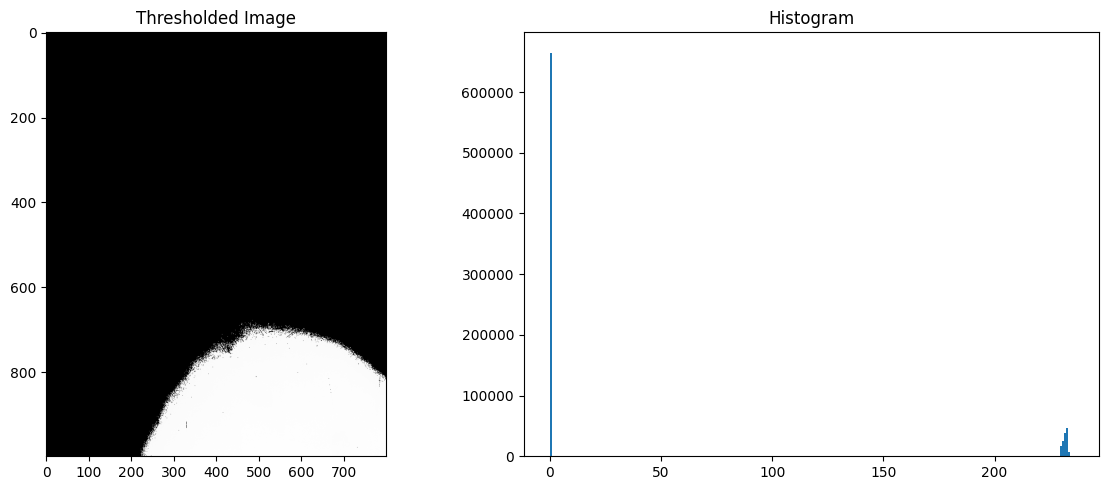

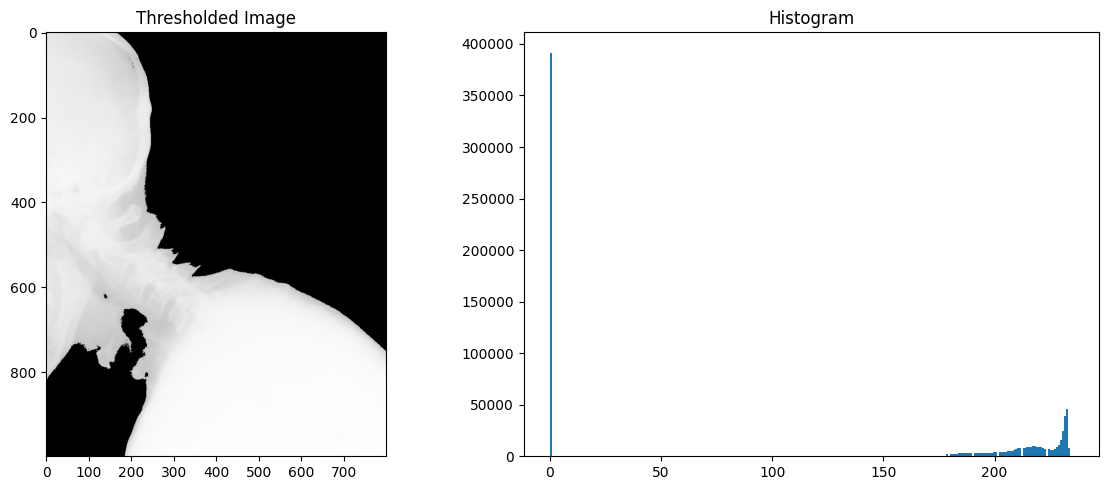

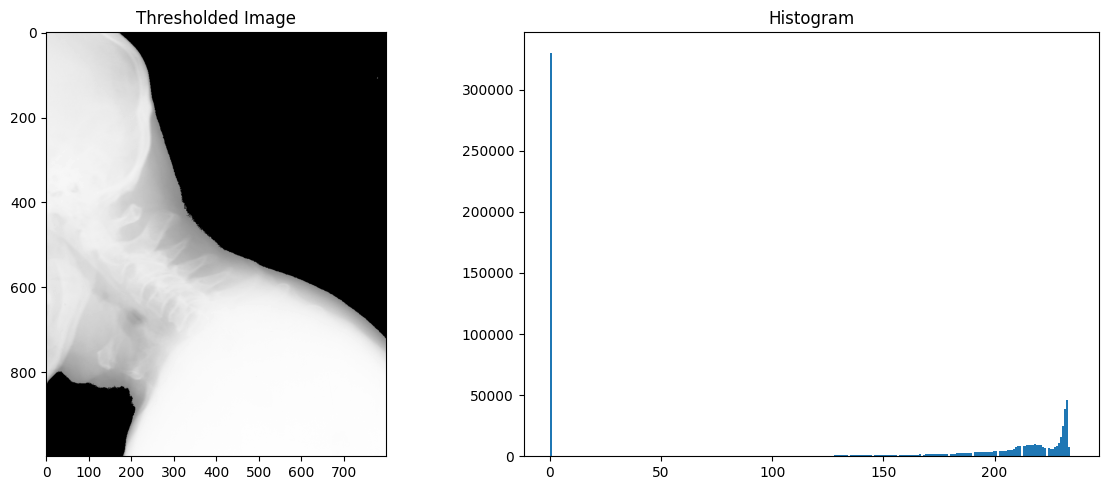

In [30]:
threshold_image(img, 0.9)
threshold_image(img, 0.7)
threshold_image(img, 0.5)

**Exercise 11:** *Read the documentation of [Otsu's method](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu) and use it to compute and apply a threshold to the vertebra image.*

In [31]:
from skimage.filters import threshold_otsu

def otsu_threshold(img_in):
    # Convert image to float format with values between 0 and 1
    img_float = skimage.img_as_float(img_in)
    
    # Calculate Otsu's threshold value on the float image
    thresh_val = threshold_otsu(img_float)
    
    # Apply the threshold to segment the float image
    thresholded_img = img_float >= thresh_val

    # Set up a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display the thresholded image on the left
    axes[0].imshow(thresholded_img, cmap='gray')
    axes[0].set_title("Otsu Thresholded Image")

    # Display histogram on the right
    axes[1].hist(img_float.ravel(), bins=256, range=(0, 1))
    axes[1].axvline(thresh_val, color='r', linestyle='dashed', linewidth=2)
    axes[1].set_title("Histogram with Otsu's Threshold")

    plt.tight_layout()
    plt.show()
    
    print(f"Otsu's threshold value: {thresh_val}")

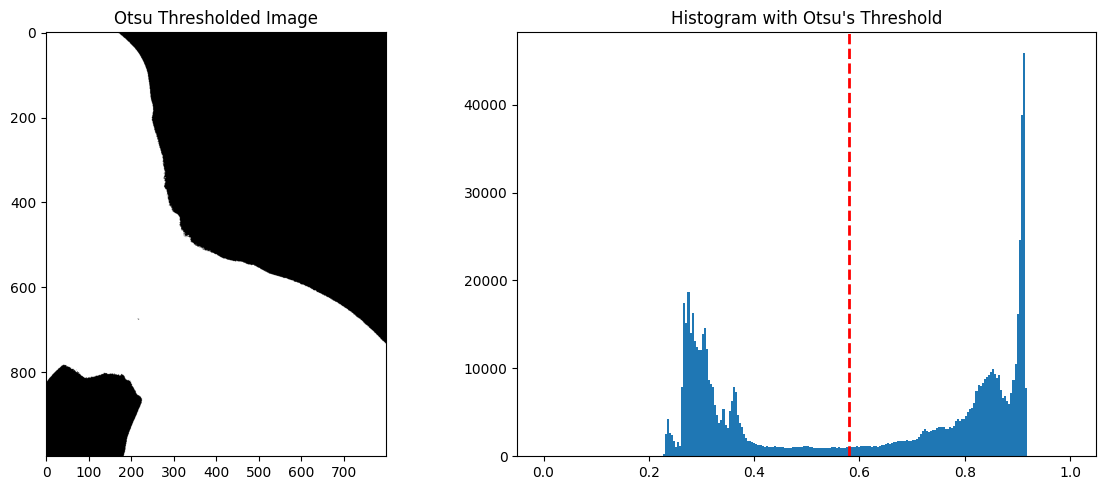

Otsu's threshold value: 0.5793658088235294


In [32]:
otsu_threshold(img)


*How does the threshold and the result compare to your manually found threshold?*

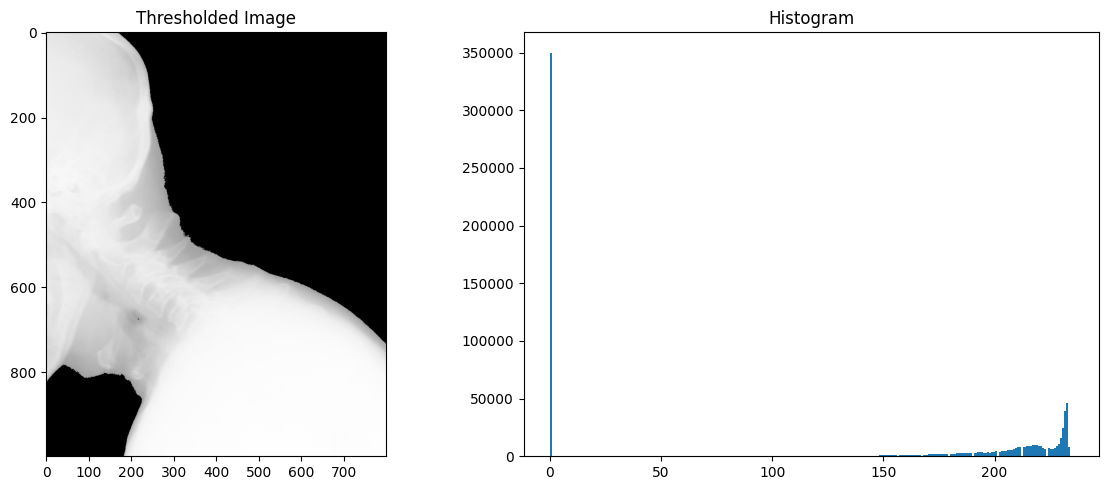

In [33]:
threshold_image(img, 0.5793658088235294)

**Exercicse 12:** *Use your camera to take some pictures of yourself or a friend. Try to
take a picture on a dark background. Convert the image to grayscale
and try to find a threshold that creates a **silhouette** image (an image where the head is all white and the background black).*

Alternatively, you can use the supplied photo **dark_background.png** found in the [exercise data](https://github.com/RasmusRPaulsen/DTUImageAnalysis/blob/main/exercises/ex3-PixelwiseOperations/data/).

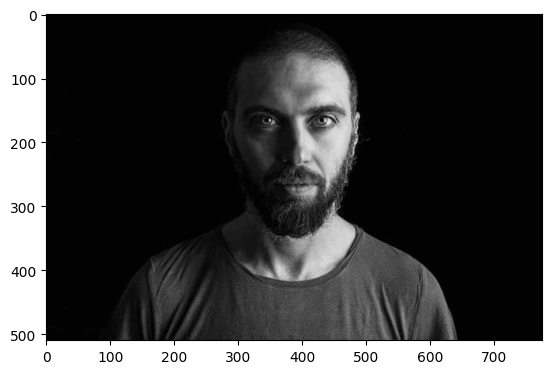

In [34]:
from skimage import color
# Read image
person = io.imread('data/dark_background.png')
person = color.rgb2gray(person)
# Show image
plt.imshow(person, cmap='gray')
plt.show()

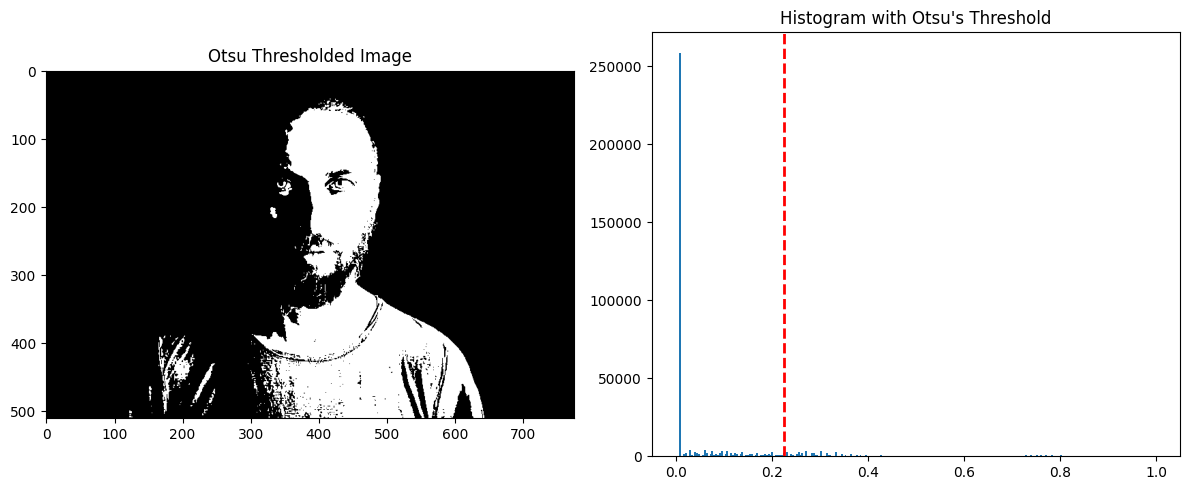

Otsu's threshold value: 0.22480754595588237


In [35]:
otsu_threshold(person)

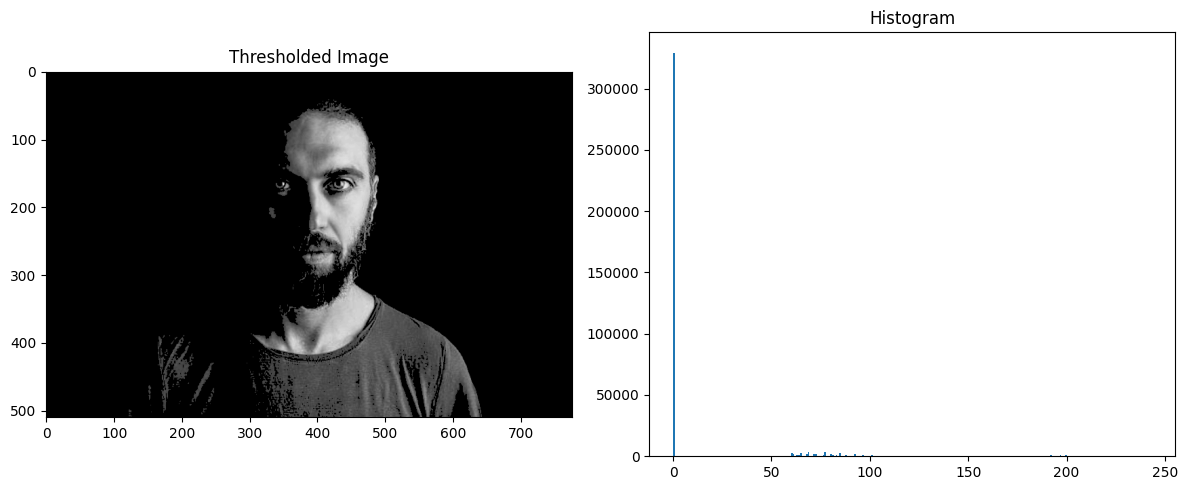

In [36]:
threshold_image(person, 0.22480754595588237)

## Color thresholding in the RGB color space

In the following, we will make a simple system for road-sign detection. Start by reading the image **DTUSigns2.jpg** found in the [exercise data](https://github.com/RasmusRPaulsen/DTUImageAnalysis/blob/main/exercises/ex3-PixelwiseOperations/data/). We want to make a system that do a *segmentation* of the image - meaning that a new binary image is created, where the foreground pixels correspond to the sign we want to detect.

We do that by tresholding the colour-channels individually. This code segments out the blue sign:

```python
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
```

**Exercise 13:** *Create a function `detect_dtu_signs` that takes as input a color image and returns an image, where the blue sign is identified by foreground pixels.*

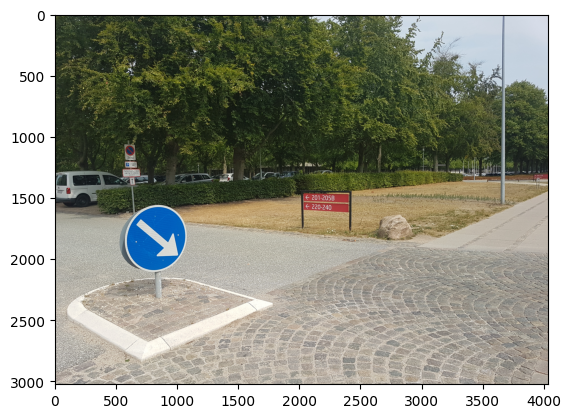

In [37]:
# Read image
dtu_sign = io.imread('data/DTUSigns2.jpg')
# Show image
plt.imshow(dtu_sign)
plt.show()

In [38]:
def detect_dtu_signs(color_img):
    r_comp = color_img[:, :, 0]
    g_comp = color_img[:, :, 1]
    b_comp = color_img[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    
    plt.imshow(segm_blue, cmap='gray')
    plt.show()

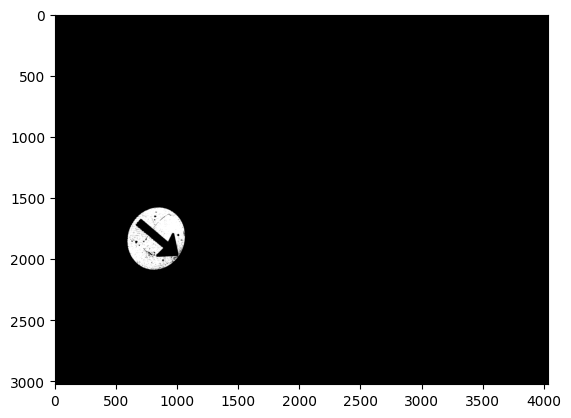

In [39]:
detect_dtu_signs(dtu_sign)

**Exercise 14:** *Extend your `detect_dtu_signs` function so it can also detect red signs. You can add an argument to the function, that tells which color it should look for. 
You should use one of the explorative image tools to find out what the typical RGB values are in the red signs.*

In [40]:
def detect_dtu_signs(color_img):
    r_comp = color_img[:, :, 0]
    g_comp = color_img[:, :, 1]
    b_comp = color_img[:, :, 2]
    
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    
    segm_red = (r_comp > 100) & (g_comp < 80) & (b_comp < 80)

    combined_segm = segm_blue | segm_red

    plt.imshow(combined_segm, cmap='gray')
    plt.show()

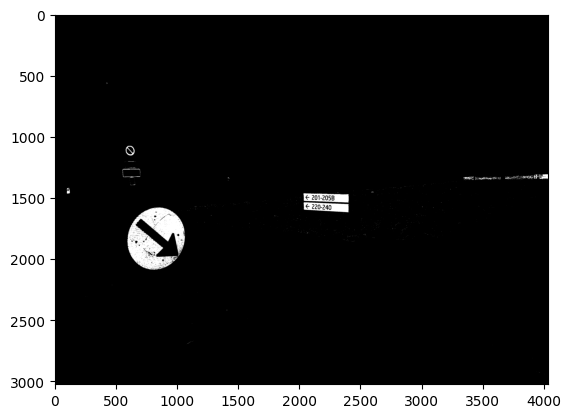

In [41]:
detect_dtu_signs(dtu_sign)

## Color thresholding in the HSV color space

Sometimes it gives better segmentation results when the tresholding is done in HSI (also known as HSV - hue, saturation, value) space. Start by reading the  **DTUSigns2.jpg** image, convert it to HSV and show the hue and value (from [here](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html)):

```python
    hsv_img = color.rgb2hsv(im_org)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
    ax0.imshow(im_org)
    ax0.set_title("RGB image")
    ax0.axis('off')
    ax1.imshow(hue_img, cmap='hsv')
    ax1.set_title("Hue channel")
    ax1.axis('off')
    ax2.imshow(value_img)
    ax2.set_title("Value channel")
    ax2.axis('off')

    fig.tight_layout()
    io.show()
```


**Exercise 15:** *Now make a sign segmentation function using tresholding in HSV space and locate both the blue and the red sign.*


In [49]:
def detech_hsv(img_in):
    hsv_img = color.rgb2hsv(img_in)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 5))
    ax0.imshow(img_in)
    ax0.set_title("RGB image")
    ax0.axis('off')
    ax1.imshow(hue_img, cmap='hsv')
    ax1.set_title("Hue channel")
    ax1.axis('off')
    ax2.imshow(value_img)
    ax2.set_title("Value channel")
    ax2.axis('off')

    fig.tight_layout()
    io.show()

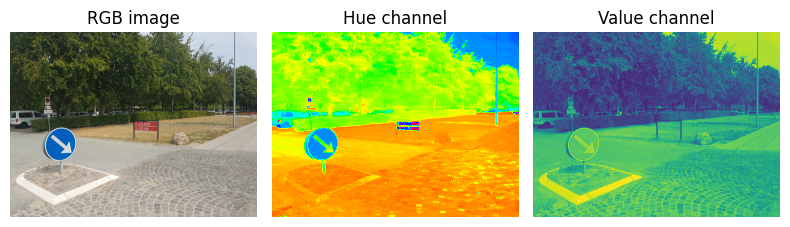

In [50]:
detech_hsv(dtu_sign)